## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
import missingno as msno

## Lab introduction

The goal of this lab is to use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO$_2$ emitters have changed over the last 50 years (1971 - 2020). In order to evaluate such a change the data will first be processed so that it can be interpreted, then will be arranged in graphs to visually represent the relationship between time and CO$_2$ emissions. 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
# definition name respresents all data that is given

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

To remove any non-country entries from the dataframe a variable is needed that defines what the non-country entries are.

In [4]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [111]:
df_c = df.loc[df['country'].isin(non_countries) == False]
# definition name refers to the data frame that this lab works within
# from this point, any work done with data will refer only to country data

This data frame will be used to exclude some data and properly represent the data we are looking at definition name refers to the data frame that this lab works within. From this point, any work done with data will refer only to country data.

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [112]:
df_c.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


The .head() command shows the first 5 rows of the data frame.

In [113]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

The .info() command shows basic info about the data frame.

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
For all of the columns the data type is correct.
*   Every value is the object type that it should be. Float64, int64, and objects are all tied to the data each column correctly.


2.  Do any of the columns have missing (null) values?
*   Yes. Many columns in the data set have null values. This is shown by the non-null count not equalling the total number of entries given by Int64Index shown in the df.info() command. For example, there are 39638 entries but only 24464 entries in the co2 column. 




##### $\rightarrow$ What years are present in the data set?

In [114]:
df_c['year'].min()

1750

In [115]:
df_c['year'].max()

2021

In [116]:
df_c.loc[:,'year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

The range of years within the dataset is 1850-2021 found by finding the max and min values for the year as well as displaying the values in between.

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



In [117]:
df_c[df_c['year'] == 2020].sort_values(by = 'co2', ascending = False). head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


In [118]:
top_10 = ['China', 'United States', 'Inida', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea']

In [119]:
df_10 = df.loc[df['country'].isin(top_10)]

The new df_10 data frame will be what is used for the rest of the lab because it's exactly what we are looking for for the goal of this lab.

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

The following graph is a histogram representing the total relationship between carbon dioxide emission tons and the density of emissions in 2020.

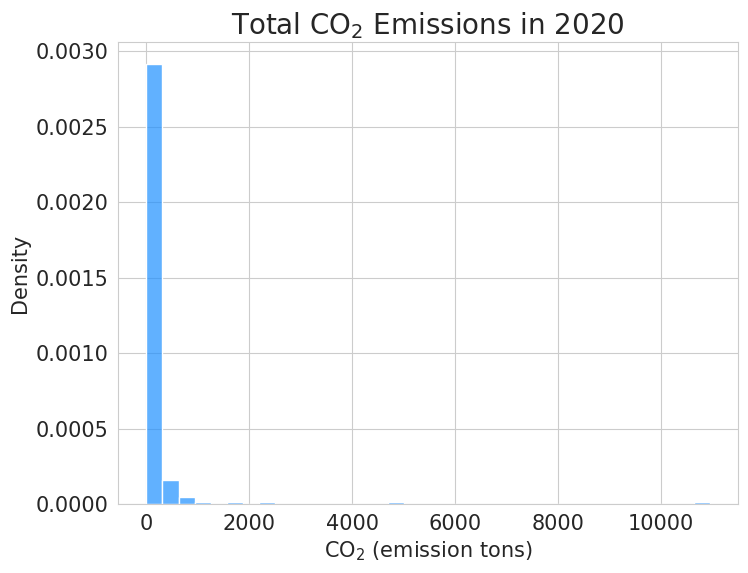

In [120]:
plt.figure(figsize = (8, 6))
sns.histplot(data = df_c[df_c['year'] == 2020], x = 'co2', bins = 35, color = 'dodgerblue', alpha = 0.7, stat = 'density')
plt.ylabel('Density', fontsize = 15)
plt.xlabel('CO$_2$ (emission tons)', fontsize = 15)
plt.title('Total CO$_2$ Emissions in 2020', fontsize = 20)
plt.tick_params(labelsize = 15)

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

The following graph is a boxplot with a strip plot laid over top showing all carbon dioxide emission data for 2020.

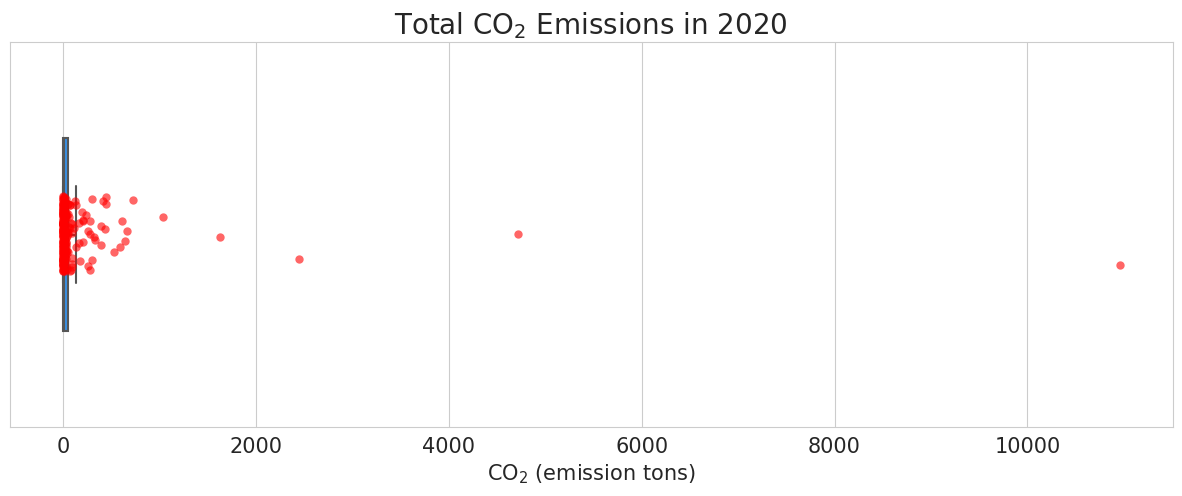

In [121]:
plt.figure(figsize = (15,5))
sns.boxplot(data = df_c[df_c['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)
sns.stripplot(data = df_c[df_c['year'] == 2020], x = 'co2', color = 'red', size = 6, alpha = 0.6)
plt.xlabel('CO$_2$ (emission tons)', fontsize = 15)
plt.title('Total CO$_2$ Emissions in 2020', fontsize = 20)
plt.tick_params(labelsize = 15)

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

There are multiple outliers of different degrees shown in the boxplot above. The outliers shown are anything outside of the initial cluster of data points from 0-1000 CO$_2$ emission tons.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [122]:
df_10['co2'].isna()

8819      True
8820      True
8821      True
8822      True
8823      True
         ...  
44218    False
44219    False
44220    False
44221    False
44222    False
Name: co2, Length: 1660, dtype: bool

In [123]:
df_10['co2'].isna().sum()

319

Using .isna() the data can be evaluated as having or not having a null value for a co2 value. Then the values are summed to show how many missing values there are in total within the column.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

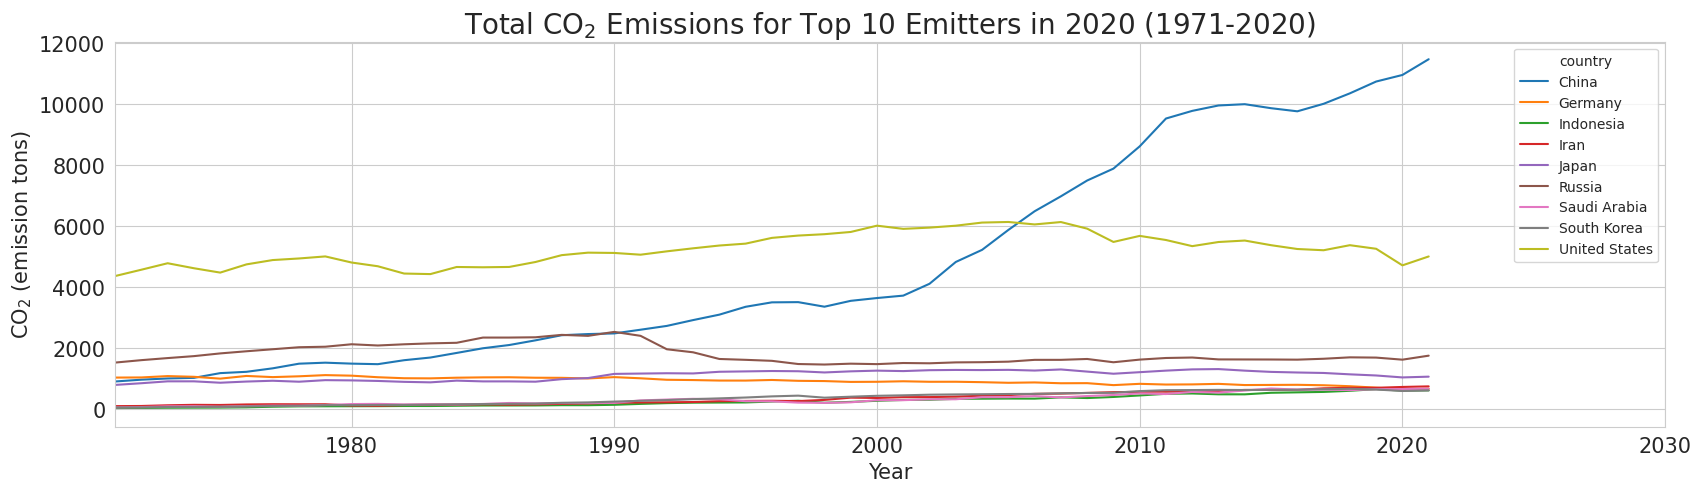

In [124]:
plt.figure(figsize = (20, 5))
sns.lineplot(data = d_10,
             x = 'year',
             y = 'co2',
             hue = 'country')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('CO$_2$ (emission tons)', fontsize = 15)
plt.xlim(1971, 2030)
plt.title('Total CO$_2$ Emissions for Top 10 Emitters in 2020 (1971-2020)', fontsize = 20)
plt.tick_params(labelsize = 15);

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

<ipython-input-125-d4d51dfdf5fd>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_c.groupby('year').mean(), x = 'year', y = 'co2', color = 'k')


Text(0.5, 1.0, 'Total CO$_2$ Emissions for Top 10 Emitters in 2020 (1971-2020) and Mean Total CO$_2$ Emissions for All Countries')

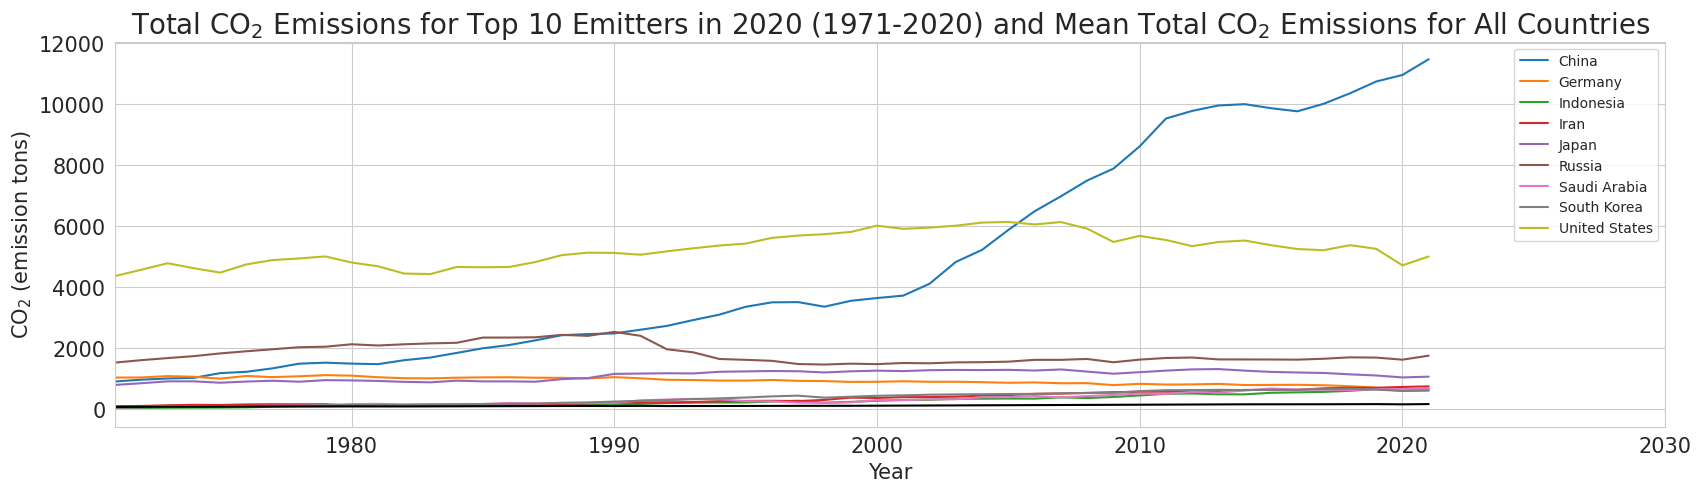

In [125]:
plt.figure(figsize = (20, 5))
sns.lineplot(data = df_10,
             x = 'year',
             y = 'co2',
             hue = 'country')
plt.xlim(1971, 2030)
plt.tick_params(labelsize = 15)
sns.lineplot(data = df_c.groupby('year').mean(), x = 'year', y = 'co2', color = 'k')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('CO$_2$ (emission tons)', fontsize = 15)
plt.title('Total CO$_2$ Emissions for Top 10 Emitters in 2020 (1971-2020) and Mean Total CO$_2$ Emissions for All Countries', fontsize = 20)

This graph is the same as the graph illustrated above but the black line in this graph is representative of the mean line for emissions of all countries

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

<ipython-input-126-dc46eaa7ed26>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df_c.groupby('year').mean(), x = 'year', y = 'co2', color = 'k')


Text(0.5, 1.0, 'Total CO$_2$ Emissions for Top 10 Emitters in 2020 (1971-2020) and Mean Total CO$_2$ Emissions for All Countries')

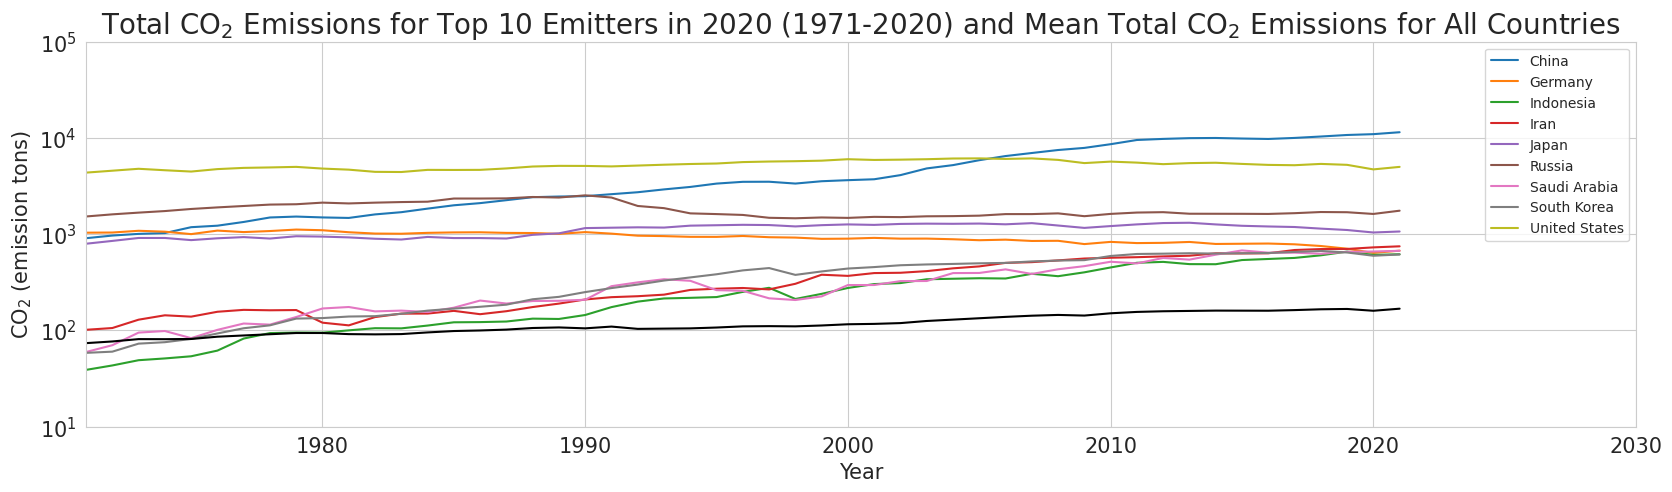

In [126]:
plt.figure(figsize = (20, 5))
sns.lineplot(data = df_10,
             x = 'year',
             y = 'co2',
             hue = 'country')
plt.xlim(1971, 2030)
plt.ylim(10**1, 10**5)
plt.tick_params(labelsize = 15)
sns.lineplot(data = df_c.groupby('year').mean(), x = 'year', y = 'co2', color = 'k')
plt.yscale('log')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('CO$_2$ (emission tons)', fontsize = 15)
plt.title('Total CO$_2$ Emissions for Top 10 Emitters in 2020 (1971-2020) and Mean Total CO$_2$ Emissions for All Countries', fontsize = 20)

This graph is the same graph illustrated above except graphed using a log scale as opposed to the values themselves

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

Overall, there is a constant rise in CO$_2$ emissions in each one of these countries. And if there isn't an increase then there is a plateau at around a given value. However, looking at the mean there is a clear rise in the amount of emission tons. It can be argued that for some of these countries there is actually a decrease in emission tons, and while that is partly true, the decrease is negligible at best. So, as a whole CO$_2$ emissions are on the rise and they are increasing more as time goes on. 